In [1]:
import pandas as pd
import feature_generation as fg
import utils as u
import numpy as np

In [2]:
btc = pd.read_csv('C:/Users/gobel/code/research_env/data/Bitfinex_BTCUSD_1h.csv', index_col='Date', parse_dates=True)
btc = btc.iloc[::-1]
btc = btc.reset_index()
btc.Date = pd.to_datetime(btc.Date, format='%Y-%m-%d %I-%p')
btc = btc.set_index('Date')
btc = btc.drop(['Symbol', 'Volume To'], axis=1)
btc.columns = ['open', 'high', 'low', 'close', 'volume']
btc['vwap'] = u.vwap(btc)
btc['returns'] = u.returns(btc)
btc['adv20'] = u.adv(btc, 20)
btc = btc[1:]
btc.head()

,open,high,low,close,volume,vwap,returns,adv20
Date,,,,,,,,
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,1333.44,4594.9,0.002006,NaN
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,738.14,4603.0,0.001763,NaN
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,570.88,4595.5,-0.001629,NaN
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,1196.97,4617.2,0.004722,NaN
2017-10-09 14:00:00,4617.2,4672.4,4614.5,4667.0,2702.16,4667.0,0.010786,NaN


In [3]:
df = btc.copy()

In [11]:
fg.alpha026(btc)

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00   -0.416025
2018-11-25 15:00:00   -0.747265
2018-11-25 16:00:00   -0.747265
2018-11-25 17:00:00   -0.747265
2018-11-25 18:00:00   -0.176471
Length: 9897, dtype: float64

In [12]:
((adv20 < volume) ? ((-1 * ts_rank(abs(delta(close, 7)), 60)) * sign(delta(close, 7))) : 
(-1 * 1)) 

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00   -0.435743
2018-11-25 15:00:00   -0.412062
2018-11-25 16:00:00   -0.279727
2018-11-25 17:00:00   -0.250279
2018-11-25 18:00:00   -0.139838
Length: 9897, dtype: float64

In [61]:
temp = np.where((0.5 < u.rank((u.ts_sum(u.corr(u.rank(df.volume), u.rank(df.vwap), 6), 2) / 2.0))), (-1 * 1),  1)
tmp =  pd.Series(temp, index=df.index)

In [20]:
temp3 = u.rank(u.ts_rank((df.volume / df.adv20), 5))
temp1 = (-1 * u.rank(u.ts_rank(df.close, 10)))
temp2 = u.rank(u.delta(u.delta(df.close, 1), 1))

In [29]:
df = df.dropna()

In [33]:
decision1 = (u.ts_sum(df.close, 8) / 8 + u.stddev(df.close, 8)) < (u.ts_sum(df.close, 2) / 2)
decision2 = (u.ts_sum(df.close, 2) / 2 < (u.ts_sum(df.close, 8) / 8) - u.stddev(df.close, 8))
decision3 = ((1 < (df.volume / df.adv20)) | ((df.volume / df.adv20) == 1))

In [34]:
decision3

Date
2017-10-10 04:00:00    False
2017-10-10 05:00:00    False
2017-10-10 06:00:00    False
2017-10-10 07:00:00    False
2017-10-10 08:00:00    False
                       ...  
2018-11-25 14:00:00    False
2018-11-25 15:00:00    False
2018-11-25 16:00:00    False
2018-11-25 17:00:00    False
2018-11-25 18:00:00    False
Length: 9843, dtype: bool

In [79]:
temp1 = np.sign((df.close - u.delay(df.close, 1))) + np.sign((u.delay(df.close, 1)))
temp2 = u.delay(df.close, 2) + np.sign((u.delay(df.close, 2)))
temp3 = 1 - u.rank(temp1 - temp2 - u.delay(df.close, 3))

temp = temp3 * u.ts_sum(df.volume, 5) / u.ts_sum(df.volume, 20)

<AxesSubplot:>

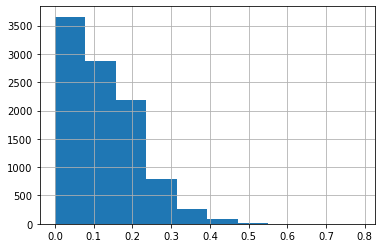

In [80]:
temp.hist()